# Numerical integration example
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Shape definition

In [11]:
def isInside(x,y,z) :
    "Sphere with unit radius and origing at (0,0,0)"
    r2 = x*x + y*y + z*z
    return int( r2 < 1 )

### (3) Run numerical integration of volume

In [51]:
def intVol(Ndiv):

    # Integration range (common for all coordinates)

    Xmin = -1.
    Xmax = 1.

    dX = (Xmax-Xmin)/Ndiv
    dV = dX**3

    # Test points in one coordinate

    Xrange = np.arange(Xmin+dX/2.,Xmax,dX)

    # Main loop

    V = 0

    for x in Xrange:
        for y in Xrange:
            for z in Xrange:
                V+=dV*isInside(x,y,z)
    
    return V

### (4) Integration with increasing precision

In [60]:
# Test values for number of divisions

n_tab = np.array([3,4,5,7,10,15,20,25,30,35,40,50,70,100])

# Main loop

v_tab = np.empty(n_tab.size)

for ind in range(n_tab.size):
    n = n_tab[ind]
    v_tab[ind] = intVol(n)
    print(n,v_tab[ind])

Vexp = 4./3.*np.pi
print("Expected value: ",Vexp)

3 5.629629629629626
4 4.0
5 5.184000000000004
7 4.174927113702611
10 4.416000000000003
15 4.245333333333356
20 4.223999999999745
25 4.2071040000002125
30 4.245333333334476
35 4.212244897957702
40 4.194000000001563
50 4.208128000002886
70 4.196944606428023
100 4.1918719999538405
Expected value:  4.1887902047863905


### (5) Plot results

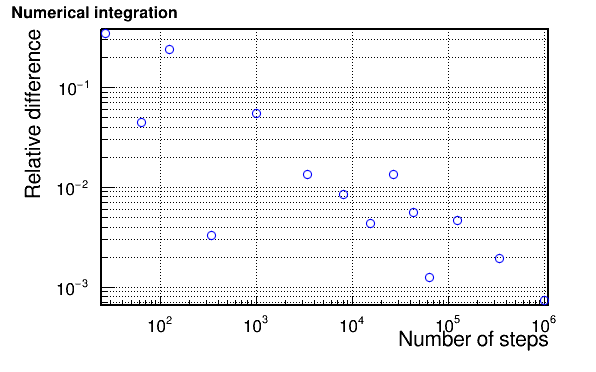

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file numerical_integration.png has been created


In [61]:
# Log scale in X and Y

gStyle.SetOptLogx(1)
gStyle.SetOptLogy(1)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Create result graph

n3_tab = n_tab**3

dv_tab = np.abs(v_tab/Vexp - 1.)

rgr = TGraph(n_tab.size,array('d',n3_tab),array('d',dv_tab))

# Set graph options

rgr.SetNameTitle("rgr","Numerical integration")
rgr.SetMarkerStyle(24)
rgr.SetMarkerColor(4)

rgr.GetXaxis().SetTitle("Number of steps")
rgr.GetYaxis().SetTitle("Relative difference")

# rgr.SetMinimum(-0.01)

# Plot 

rgr.Draw('AWP')

cexp.Update()
fname = 'numerical_integration.png'
cexp.Print(fname)

Image(filename=fname)